In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import os

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 


## 数据处理和分析可视化操作的过程

1、导入包和导入数据 \br
2、数据检验和校正
3、检验假设
    线性和异常值处理
    填补缺失变量
    分布的正态性和变换
4、特征工程
    特征缩放
    编码和分类
        手动标签编码
        一次热编码
5、模型构建和评估
    模型训练
    模型评估
        K-Fold 交叉验证
        超参数优化
        重新训练和预测


In [1]:
!pip install seaborn
# 数据安装
%matplotlib inline

KeyboardInterrupt: 

## 文件数据处理模块信息

os.walk(dirpath) 使用深度遍历的方式进行文件夹的遍历和操作
https://blog.csdn.net/qq_37344125/article/details/107972463


    for roots,dirs,files in os.walk(dirpath):
        root保存的就是当前遍历的文件夹的绝对路径；
        dirs保存当前文件夹下的所有子文件夹的名称（仅一层，孙子dir不包括）
        files保存当前文件夹下的所有文件的名称


In [ ]:
import os
for dirname, _, filenames in os.walk('..'):
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk('/kaggle/input/'):
    # filenames 有两个，第一个是空的，第二个是有数据的所以，下面的一层循环只是对第二个filenames进行遍历操作
    # dirname 是指的是源文件夹路径和当前该文件夹下的文件夹路径
    print(filenames)
    for filename in filenames:
        print(filename)
        print(os.path.join(dirname, filename))

    # Result is follow!
    # house_state.csv
    # /kaggle/input/us-election-2020/house_state.csv



COMMIT_EDITMSG
..\.git\COMMIT_EDITMSG
config
..\.git\config
description
..\.git\description
FETCH_HEAD
..\.git\FETCH_HEAD
HEAD
..\.git\HEAD
index
..\.git\index
ORIG_HEAD
..\.git\ORIG_HEAD
packed-refs
..\.git\packed-refs
applypatch-msg.sample
..\.git\hooks\applypatch-msg.sample
commit-msg.sample
..\.git\hooks\commit-msg.sample
fsmonitor-watchman.sample
..\.git\hooks\fsmonitor-watchman.sample
post-update.sample
..\.git\hooks\post-update.sample
pre-applypatch.sample
..\.git\hooks\pre-applypatch.sample
pre-commit.sample
..\.git\hooks\pre-commit.sample
pre-merge-commit.sample
..\.git\hooks\pre-merge-commit.sample
pre-push.sample
..\.git\hooks\pre-push.sample
pre-rebase.sample
..\.git\hooks\pre-rebase.sample
pre-receive.sample
..\.git\hooks\pre-receive.sample
prepare-commit-msg.sample
..\.git\hooks\prepare-commit-msg.sample
push-to-checkout.sample
..\.git\hooks\push-to-checkout.sample
update.sample
..\.git\hooks\update.sample
exclude
..\.git\info\exclude
HEAD
..\.git\logs\HEAD
main
..\.git\l

## Pandas 数据处理模块
    读取文件和保存文件
    pandas.read_csv()
    
    合并数据集
    dataFrame 数据集采用左右连接的方式进行数据DataFrame 数据的扩展  left or right join concept 
    governors_data = governors_county.merge(governors_candidate, how="left",on=["state","county"])


    创建新的数据集
    使用已有的数据提取或者计算新的数据集
    governors_data["state_county_reported_votes"] = governors_data ["current_votes"]

    删除不适用的数据列
    governors_data.drop(columns=["current_votes","total_votes","votes_x","votes_y"])

    重新指定索引 set_index函数
    df_final = df_final.drop(['weather'],axis=1).set_index('date')
    
    使用reindex进行重新构建数据信息 
    重新指定行
    可以使用reindex  index= ['a','b'], 多出来的index，可以使用fill_value 填充fill_value 
    
    重新指定列
    columns_sequence = ["state","county","candidate","party","state_county_candiate_votes","state_county_reported_votes","state_county_total_votes","state_votes","percent","won"]
    governors_data = governors_data.reindex(columns=columns_sequence)

    数据空值填充
    data.fillna(value=0)

    数据空值数量统计
    data.isna().sum()

    数据转换为时间
    <!-- 将object类型的数据转换成为datatime -->
    df['date'] = pd.to_datetime(df['date'])


    <!-- 时间信息具体化----分列操作 -->
    def date_time(df) :
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year #Generate Year Column
        df['month'] = df['date'].dt.month #Generate Month Column
        df['day'] = df['date'].dt.day
        return df
    df_final = date_time(df)

    数据的二维访问方式
    data[["precipitation","temp_max","temp_min","wind"]].describe()

    
    
    不一样的数据信息
    df.nunique()

    dataFrame 中数据的替换  http://www.manongjc.com/detail/30-zupttitssoqyxzb.html
    df.replace(to_replace ="rain", value = 2, inplace = True) 
    <!-- 将表中的rain 使用2进行代替 -->
    df.replace(to_replace =["Boston Celtics", "Texas"],  
                            value ="Omega Warrior")
    <!-- 将在“ df” DataFrame 中将小组“Boston Celtics”和“Texas”替换为“Omega Warrior”。 -->

## 数据获取或者保存模块

governors_data.values  #the result is a array
X = array[:,0:8]
Y = array[:,9]

## 数据变换模块
pivot_table 数据透视表 https://blog.csdn.net/qq_55342245/article/details/121673329
won_state_details  = pd.pivot_table(governors_data_df,index=["state"],columns="won",values="party",fill_value=0,aggfunc=lambda x: len(x))



## 数据按照某列的值进行排序
data.sort_values("state_county_candiate_votes",ascending=False))


## 获取数据信息
data.info()
data.describ()


## SKlearn 数据处理模块



LabelEncoder 是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码 
按照原始数据的大小建立index 并且分别对应

https://blog.csdn.net/weixin_38278334/article/details/82971752
    fit(y)：fit可看作一本空字典，y看作要塞到字典中的词
    transform(y) ：将y转变成索引值。  
    fit_transform(y)相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。
    inverse_transform(y)：根据索引值y获得原始数据

OneHotEncoder
这种表示方式将每一个分类特征变量的m个可能的取值转变成m个二值特征，对于每一条数据这m个值中仅有一个特征值为1，其他的都为0


from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

# 数据集之间的相关操作
from sklearn.model_selection import KFold,cross_val_score,train_test_split

<!--  数据集划分 -->
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 求取混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# K折交叉验证
kflod = KFold(n_splits=10,shuffle=True,random_state=7)
model = AdaBoostClassifier(n_estimators=30,random_state=7)
results = cross_val_score(model,X,Y,cv=kflod)



from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.predict([[2.6,12.3,14.3,2.6]])
from sklearn.metrics import r2_score
r2_a_score = model.score(X_test,y_test)
print(r2_a_score*100,'%')

from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()
classifier_sgdc.fit(X_train, y_train)
r2_a_score = classifier_sgdc.score(X_test,y_test)
print(r2_a_score*100,'%')


from sklearn.naive_bayes import GaussianNB
gas = GaussianNB()
gas.fit(X_train,y_train)
r2_a_score = gas.score(X_test,y_test)
print(r2_a_score*100,'%')


In [ ]:

from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()


# 1
# 先使用fit 将其转换成为列表，然后是使用tranform 提取index
# 或者直接使用fit_transform 将其转换成为index
test = le.fit([1, 2, 2, 5,6]).classes_

test = le.fit([1, 2, 2,5, 6])
test1 = le.fit_transform([1, 1, 2, 6]) 
print(test1)


test1 = le.fit_transform([1, 1, 2,5, 6]) 
print(test1)

# 2 
# 使用inverse_transform将其恢复成为原来的数组信息
test2 = le.inverse_transform([0, 0, 1, 2,3])
print(test2)


[0 0 1 2]
[0 0 1 2 3]
[1 1 2 5 6]


In [ ]:

from sklearn.preprocessing  import OneHotEncoder
enc = OneHotEncoder()

data = enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])  # 注意：第1、2、3列分别有2、3、4个可能的取值
data2 = enc.transform([[0, 1, 3]]).toarray() #要对[0,1,3]进行编码
print(data2)

[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]


## 绘制图形



# 共有问题
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})  #解决中文不能显示问题

fig,axs=plt.subplots(2,2,figsize=(10,8))


# sns 进行绘制图形  
https://blog.csdn.net/dxawdc/article/details/107374242?spm=1001.2101.3001.6650.5&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-5-107374242-blog-122931096.pc_relevant_default&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-5-107374242-blog-122931096.pc_relevant_default&utm_relevant_index=6
    
    sns 绘制热力图 https://www.pianshen.com/article/380864759/
    https://www.freesion.com/article/1117337374/
    
    sns 使用pairplot函数展示两两特征之间的关系 https://blog.csdn.net/DDxuexi/article/details/115769440
    
    sns 使用lmplot 绘制回归图 https://zhuanlan.zhihu.com/p/94545037
   
    sns 使用countplot 进行数据的统计 sns.countplot("weather",data=data,palette="hls") 使用函数进行统计之后，最好输出数据所占的比例信息

    sns 使用histplot 函数进行直方图统计
    <!-- ax 表示在哪个轴上进行画图 -->
        sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
        sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
        sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
        sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

    sns violinplot 显示定量数据在一个或者多个分类变量的多个层次上的分布 https://zhuanlan.zhihu.com/p/34059825
    sns.violinplot(x="gender",y="age",data=data)

    sns boxplot 函数 https://zhuanlan.zhihu.com/p/34059825
    
### plt 绘制图形
import matplotlib.pyplot as plt
#### plt 绘制条形图
plt.figure(figsize=(25,5))
plt.bar("state","state_county_candiate_votes",data=governors_data_df[governors_data_df["won"]==True].sort_values("state_county_candiate_votes",ascending=False))
plt.show()



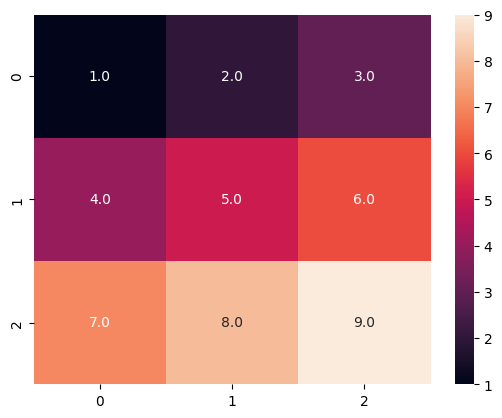

In [4]:
import seaborn as sns
import numpy as np

data = np.array([[1,2,3],[4,5,6],[7,8,9]])
sns.heatmap(data,annot=True,fmt=".1f")
plt.show()

In [5]:
import pandas as pd 
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})  #解决中文不能显示问题
iris=datasets.load_iris()
iris_data= pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['species']=iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3)) 
iris_data.rename(columns={
                     "sepal length (cm)":"萼片长",
                     "sepal width (cm)":"萼片宽",
                     "petal length (cm)":"花瓣长",
                     "petal width (cm)":"花瓣宽",
                     "species":"种类"},
                 inplace=True
                )
iris_data.head(3).append(iris_data.tail(3)) 


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7104\1040526335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data.head(3).append(iris_data.tail(3))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7104\1040526335.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data.head(3).append(iris_data.tail(3))


,萼片长,萼片宽,花瓣长,花瓣宽,种类
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


d:\dev\pythondev\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


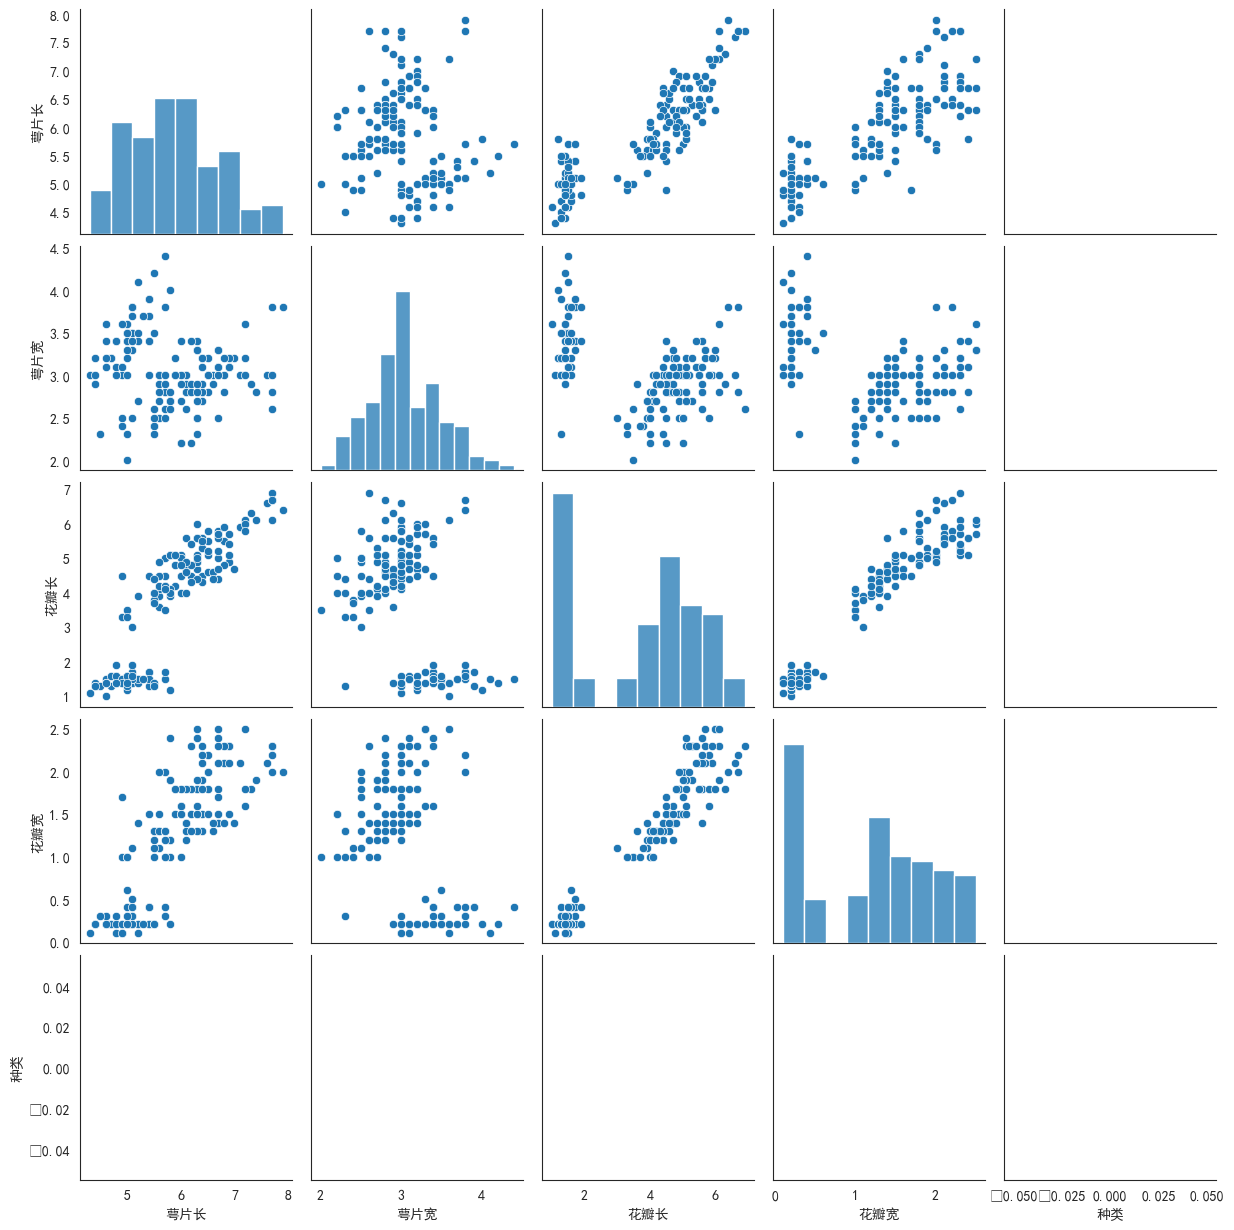

In [11]:
kind_dict = {
    "setosa":"山鸢尾",
    "versicolor":"杂色鸢尾",
    "virginica":"维吉尼亚鸢尾"
}
iris_data["种类"] = iris_data["种类"].map(kind_dict)
# 全部变量都放进去
sns.pairplot(iris_data)


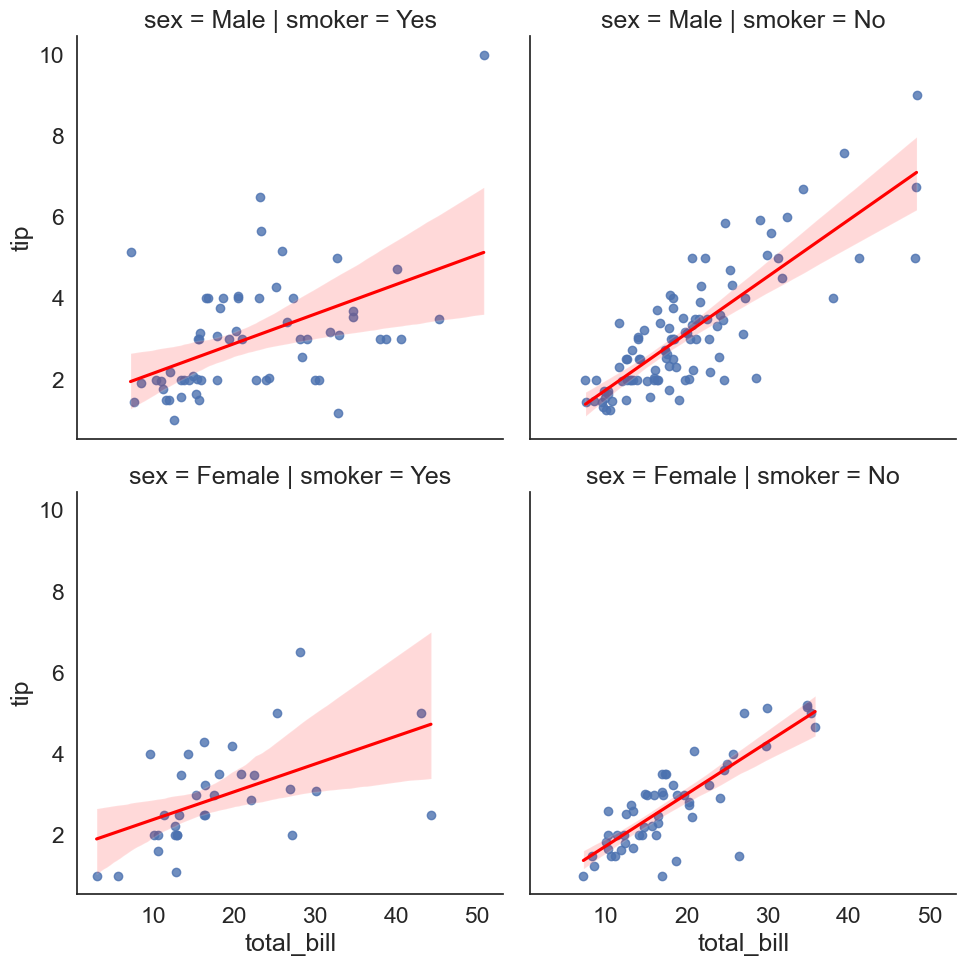

In [19]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5,style="white")
data=sns.load_dataset("tips")
data.head(5)

sns.lmplot(x="total_bill",y="tip",row = "sex",col = "smoker",data=data,line_kws={"color":"red"})
# col:根据所指定属性在列上分类  row:根据所指定属性在行上分类

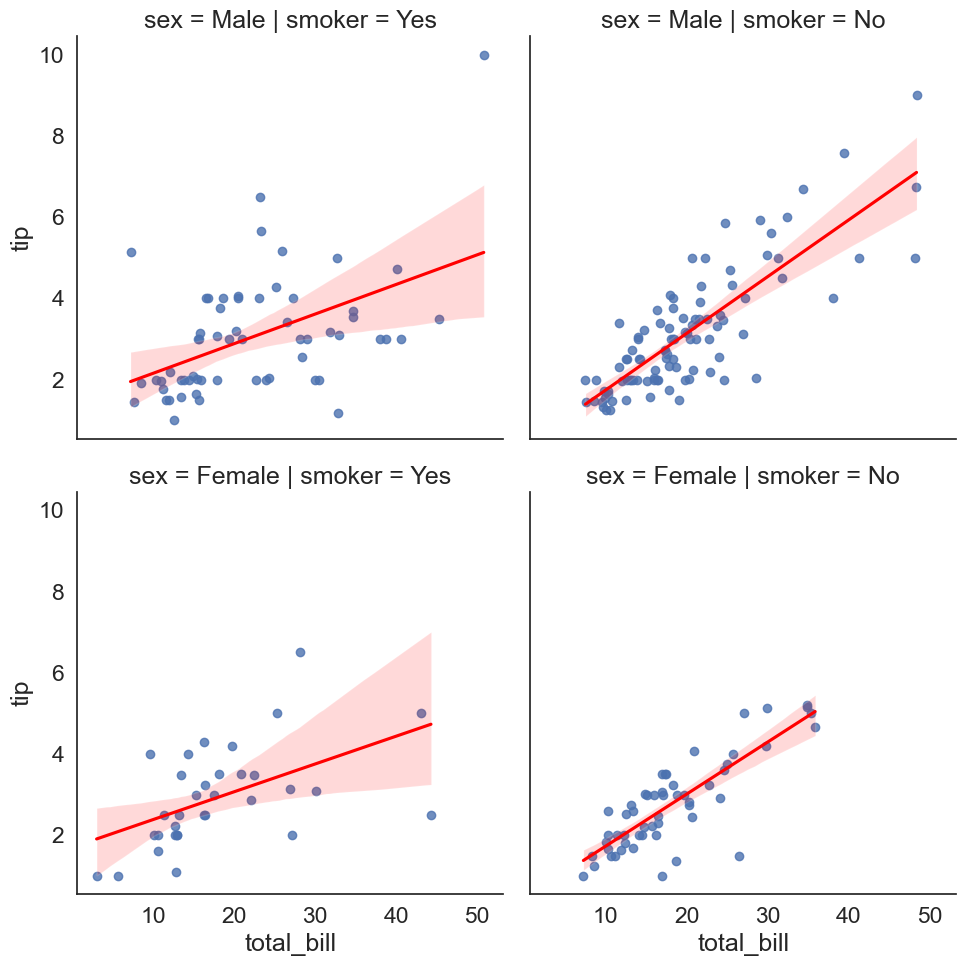